### 1. 앙상블 - 보팅(Voting) Classifier

- 저번 시간에 사용했던 유방암 데이터를 이용하여 Voting(투표) 방식의 앙상블을 적용해보겠습니다.
- 유방암 데이터는 30개의 조건을 가지고 유방암 유/무를 분류하는 문제입니다.

#### 1) 데이터 불러오기

In [1]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

cancer = load_breast_cancer()

data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### 2) TRAIN, TEST SET 분리

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=12345)

In [33]:
print(X_train.shape)
print(y_test.shape)
print(X_train.shape)
print(y_test.shape)

(455, 30)
(114,)
(455, 30)
(114,)


#### 3) Voting 모델링

- 로지스틱회귀, KNN을 기반으로 Soft Voting 방식으로 Voting Classifier를 만들어보겠습니다.

##### Soft Voting :  확률 값을 더해서 각각의 확률을 구한 후 최종값을 도출하는 Voting

In [34]:
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

In [35]:
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression),
                                            ('KNN', knn)], voting='soft')

In [36]:
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

보팅 분류기의 정확도:  0.9649


In [38]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1])

In [37]:
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9561
KNeighborsClassifier 정확도: 0.9298


- Voting Classifier를 이용하여 결과를 나타내보았습니다.
- 각각의 모형보다 Voting 앙상블하여 나온 모형의 결과과 더 좋았습니다.
- 하지만 결과가 늘 성능 향상이 되는 것은 아닙니다. train과 test set의 split한 데이터에 따라 결과값이 단일 모형이 더 좋을때도 있었습니다.

##### Hard Voting : 최종 값을 가장 많은 표를 얻은 결과를 선택하는 Voting

In [40]:
voting_model_hd = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression),
                                            ('KNN', knn)], voting='hard')

In [41]:
voting_model_hd.fit(X_train, y_train)
pred = voting_model_hd.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

보팅 분류기의 정확도:  0.9298


- 위 데이터에 대하여 조금 더 올바른 Voting 방법은 Hard Voting보다 Soft Voting 방법인 것 같습니다. 

### 2. 앙상블 - 배깅(Bagging)

- 배깅 알고리즘은 다음과 같은 프로세스로 흘러나옵니다.
1) 동일한 알고리즘을 사용한느 일정 수의 분류기를 생성합니다.<br>
2) 각각의 분류기는 Bootstrap 방식으로 생성된 샘플데이터를 학습합니다.<br>
3) 최종적으로 모든 분류기가 예측을 결정합니다. <br>

- 이때 부트스트랩이란 전체 데이터에서 일부 데이터의 중첩을 허용하는 방식입니다.
- 여기서는 배깅의 대표적인 방법인 랜덤 포레스트를 이용해보겠습니다.

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('랜덤 포레스트의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

랜덤 포레스트의 정확도:  0.9474


- Hard Voting보다는 괜찮은 결과가 나왔습니다.
- 하지만 랜덤 포레스트는 하이퍼 파라미터가 많기 때문에 grid search 알고리즘을 이용해서 조금 더 높은 정확도가 나올 수 있도록 찾아줍니다.

In [50]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100, 50 , 60],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [1, 2, 4,8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 50}
최고 예측 정확도: 0.9538


- grid search를 이용하여 지정한 수 안에서 최적의 파라미터를 찾아보았습니다.

##### feature importance 시각화

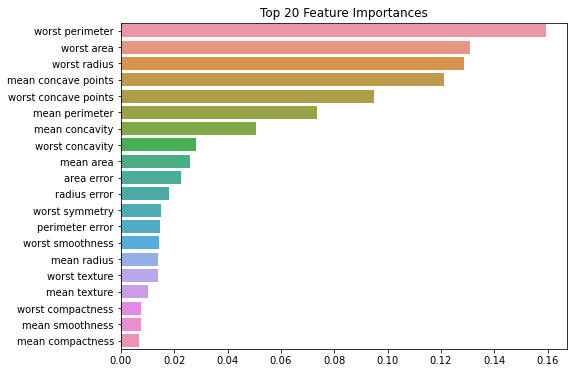

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### [마무리]

- 이번시간에는 앙상블 보팅과 배깅에 관하여 공부를 해보았습니다.
- 다음시간에는 앙상블 부스팅과 스태킹 기법에 관하여 동일 데이터로 결과를 구현해보겠습니다.

### 감사합니다!

### [Reference]
https://injo.tistory.com/31?category=1068433